<a href="https://colab.research.google.com/github/ksy2090/report/blob/main/VIX%EC%A7%80%EC%88%98%EC%99%80_%EA%B4%80%EB%A0%A8%EC%A2%85%EB%AA%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **VIX지수**

VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 CBOE VIX라고 표기하기도 합니다.

주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 '공포지수'라고도 부르기도 합니다.

VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

In [6]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [2]:
!pip install -q finance-datareader


In [13]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '1990-01-01', '2021-01-13') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-01-07,22.37,23.67,23.91,22.25,0.0,-0.1077
2021-01-08,21.56,22.43,23.34,21.42,0.0,-0.0362
2021-01-11,24.08,23.31,24.81,23.23,0.0,0.1169
2021-01-12,23.33,23.49,25.15,22.83,0.0,-0.0311
2021-01-13,22.21,23.08,24.18,21.92,0.0,-0.0480


Text(2021-01-13, 83, '83')

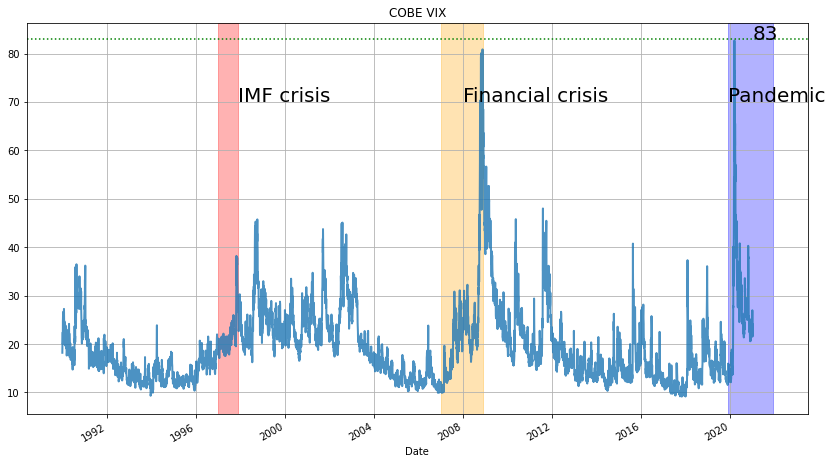

In [36]:
#@vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='orange') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2021-12', alpha=0.3, color='blue') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09 VIX 4.46
ax.axhline(83, ls=':', c='g') # 51.55 (2020-03-09 VIX)
ax.annotate('83', xy=('2021-01-13', 83), fontsize=20)

**# 팬데믹으로 인한 VIX지수는 20~30사이로 안정화 됐음.**



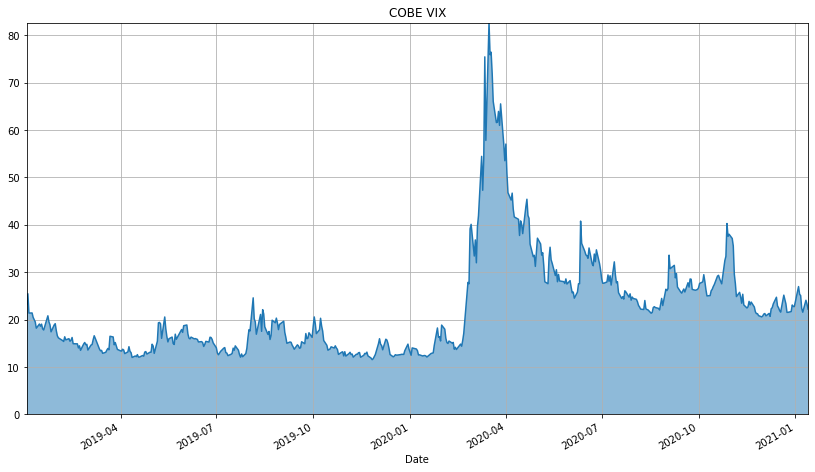

In [29]:
values = vix['2019-01-01':'2021-12-31']['Close']

ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX')
ax.fill_between(values.index, 0, values, alpha=0.5)
ax.margins(0)

 VIX 지수를 보면 2월 중순이후 급격하게 높아지는 것을 볼 수 있습니다.

In [48]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01', '2021-01-13') # S&P 500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01', '2021-01-13') # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01', '2021-01-13') # S&P 500 index

import pandas as pd

df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

Text(2019-12, 70, 'Pandemic')

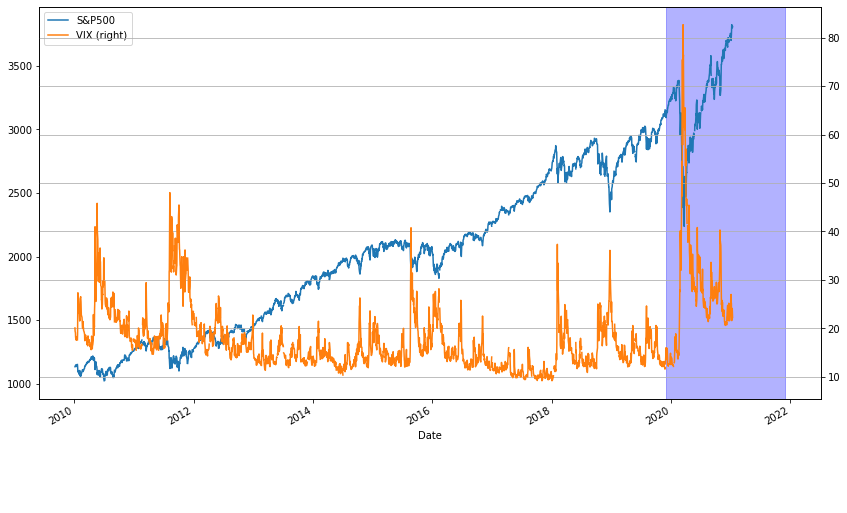

In [56]:
#@vix index
ax = df[['S&P500', 'VIX']].plot(secondary_y='VIX')
# 팬데믹
ax.axvspan('2019-12', '2021-12', alpha=0.3, color='blue') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

Text(2019-12, 70, 'Pandemic')

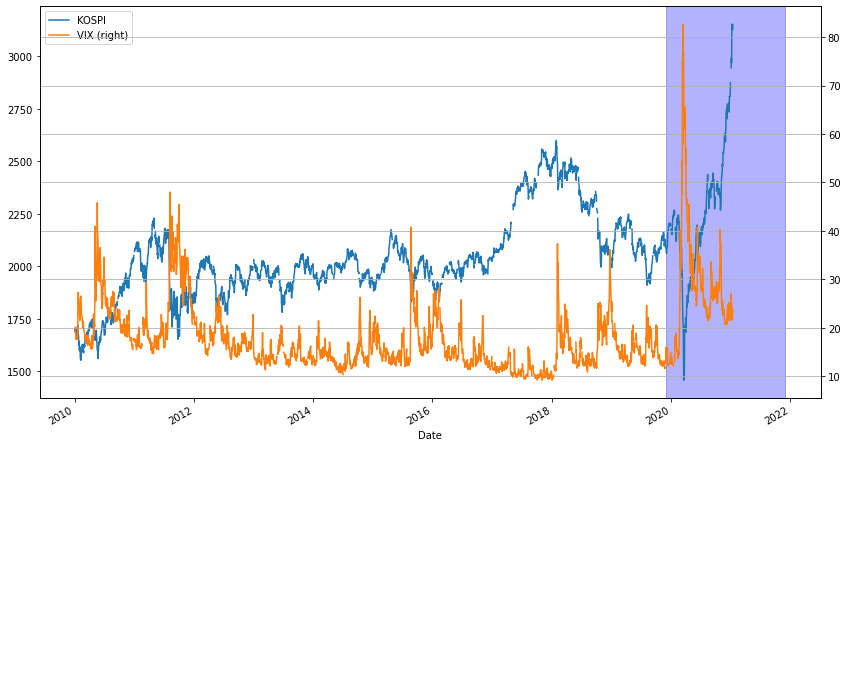

In [59]:
ax = df[['KOSPI', 'VIX']].plot(secondary_y='VIX')
# 팬데믹
ax.axvspan('2019-12', '2021-12', alpha=0.3, color='blue') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

In [60]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.318492,-0.082304
KOSPI,-0.318492,1.000000,0.717481
S&P500,-0.082304,0.717481,1.000000


KOSPI지수와 S&P500지수의 상관계수는 0.70으로 매우 높게 나타납니다.

VIX지수의 경우 S&P500지수와는 -0.08, KOSPI지수와는 -0.31로 역상관 관계가 나타납니다. VIX지수에 배팅한다는 것은 주식시장의 하락에 배팅을 한다는 의미가 됩니다.


**## VIX 관련 종목**

VIX 관련한 투자 가능한 종목들의 심볼과 가격들을 살펴봅니다.


국내 VIX관련 ETN
- 530065: 삼성 S&P500 VIX S/T 선물 ETN(H) B
- 500045: 신한 S&P500 VIX S/T 선물 ETN B
- 550058: QV S&P500 VIX S/T 선물 ETN B

해외선물
- VX: S&P 500 VIX 선물 (해외선물)

미국 ETF
- VXX: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
- VIXY: ProShares VIX Short-Term Futures ETF (NYSE)
- VIXM: ProShares VIX Mid-Term Futures ETF (NYSE)
- VIIX: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
- VXZ: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
- XVZ: iPath S&P 500 Dynamic VIX ETN (NYSE)
- EVIX: VelocityShares 1X Long VSTOXX Futures ETN (NYSE)
- FinanceDataReader를 통해 위 종목들의 가격 데이터를 모두 조회가 가능합니다.



## S&P 500 VIX 선물(해외선물)

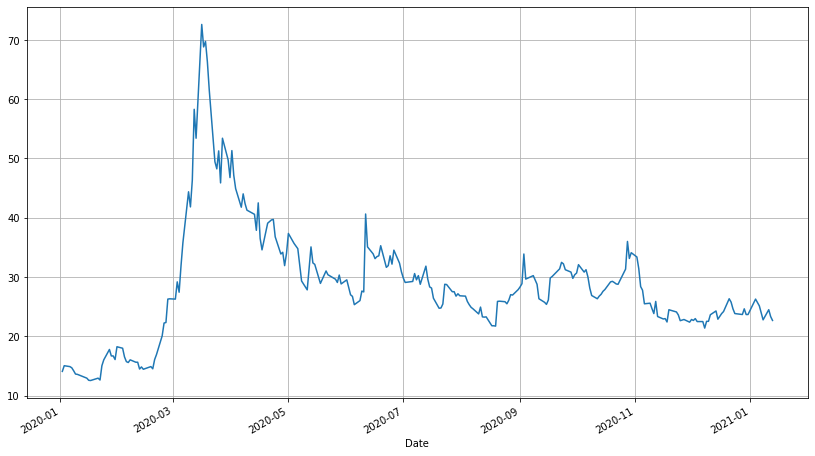

In [54]:
fdr.DataReader('VX', '2020-01-01', '2021-01-13')['Close'].plot()

# **삼성 S&P500 VIX S/T 선물 ETN(H) B (530065)**

국내 VIX와 연계된 ETN 종목 하나를 살펴봅니다.

삼성 S&P500 VIX S/T 선물 ETN(H) B (코스피)

https://finance.naver.com/item/main.nhn?code=530065

In [61]:
fdr.DataReader('530065', '2020-01-01', '2021-01-13').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-07,12845,12945,12645,12705,40983,-0.054336
2021-01-08,12395,12420,12275,12360,22024,-0.027155
2021-01-11,12420,12705,12385,12685,46478,0.026294
2021-01-12,12910,12950,12740,12855,64132,0.013402
2021-01-13,12590,12630,12505,12575,18381,-0.021781


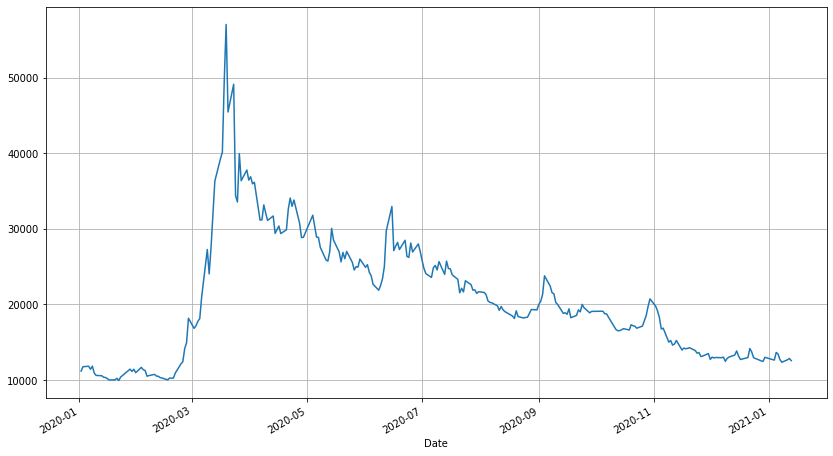

In [66]:
fdr.DataReader('530065', '2020-01-01', '2021-01-13')['Close'].plot()


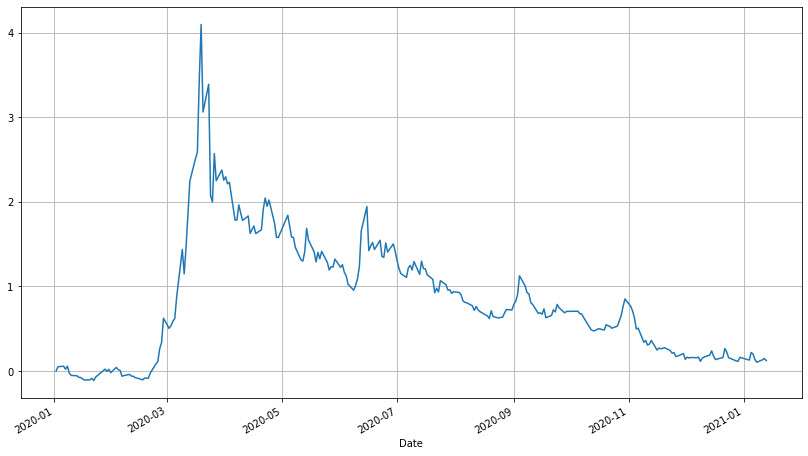

In [69]:

price = fdr.DataReader('530065', '2020-01-01', '2021-01-13')['Close']
returns = price / price[0] - 1.0
returns.plot()

In [70]:
returns[-1]

0.12377122430741738

약 1년의 (2020-01-01 ~ 2021-01-13) 수익률이 12.37% 입니다.